In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
red=pd.read_csv('winequality-red.csv',sep=";")

In [20]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
white=pd.read_csv("winequality-white.csv",sep=";")

In [13]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [21]:
df=pd.DataFrame(data=red)

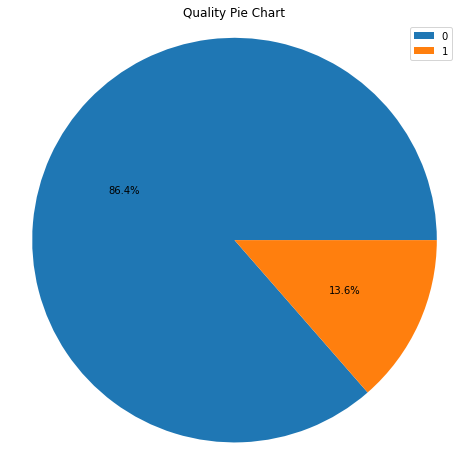

The good quality wines count for  13.6 %.


In [26]:
df['grade'] = 1 # good
df.grade[df.quality < 7] = 0 # not good

plt.figure(figsize = (8,8))
labels = df.grade.value_counts().index
plt.pie(df.grade.value_counts(), autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.title('Quality Pie Chart')
plt.show()
print('The good quality wines count for ',round(df.grade.value_counts(normalize=True)[1]*100,1),'%.')

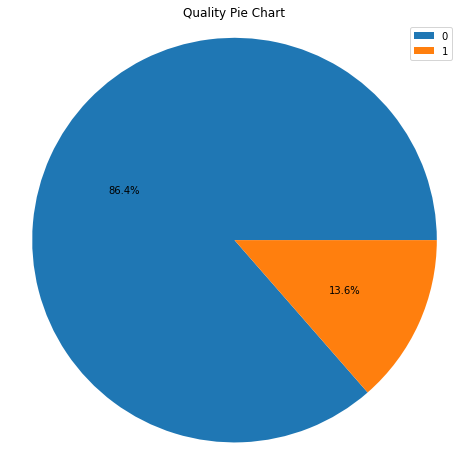

The good quality wines count for  13.57 %.


In [64]:
df['grade'] = 1 # good
df.grade[df.quality < 7] = 0 # not good

plt.figure(figsize = (8,8))
labels = df.grade.value_counts().index
plt.pie(df.grade.value_counts(), autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.title('Quality Pie Chart')
plt.show()
print('The good quality wines count for ',round(df.grade.value_counts(normalize=True)[1]*100,2),'%.')


In [29]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


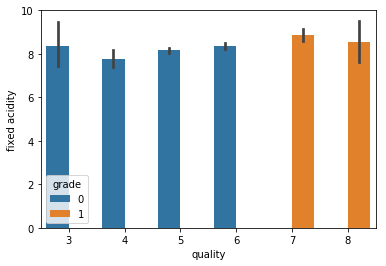

In [33]:
sns.barplot(x="quality",y="fixed acidity",hue="grade",data=df)

In [50]:
labels.index

Int64Index([0, 1], dtype='int64')

In [70]:
df.quality.value_counts().index

Int64Index([5, 6, 7, 4, 8, 3], dtype='int64')

In [71]:
round(df.quality.value_counts(normalize=True)[8]*100,2)

1.13

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [74]:
x=df.iloc[:,:-2]
y=df.iloc[:,-2]

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)

In [76]:
dtc=DecisionTreeClassifier()

In [77]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
dtc.score(x_train,y_train)

1.0

In [81]:
pred=dtc.predict(x_test)
accuracy_score(y_test,pred)

0.5928030303030303

In [84]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.12      0.05      0.07        22
           5       0.72      0.71      0.72       233
           6       0.52      0.56      0.54       195
           7       0.52      0.52      0.52        71
           8       0.00      0.00      0.00         4

   micro avg       0.59      0.59      0.59       528
   macro avg       0.31      0.31      0.31       528
weighted avg       0.58      0.59      0.59       528



In [85]:
confusion_matrix(y_test,pred)

array([[  0,   1,   1,   1,   0,   0],
       [  0,   1,  10,   9,   2,   0],
       [  0,   2, 166,  61,   4,   0],
       [  2,   4,  50, 109,  27,   3],
       [  0,   0,   4,  27,  37,   3],
       [  0,   0,   0,   3,   1,   0]], dtype=int64)

In [87]:
auc=roc_auc_score(y_test,pred)

ValueError: multiclass format is not supported

In [88]:
roc_curve(y_test,pred)

ValueError: multiclass format is not supported

In [89]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


EDA

In [90]:
df.shape

(1599, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x285607b0908>,
 'caps': [<matplotlib.lines.Line2D at 0x285607b0f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x285607b04e0>],
 'medians': [<matplotlib.lines.Line2D at 0x285607b4668>],
 'fliers': [<matplotlib.lines.Line2D at 0x285607b49b0>],
 'means': []}

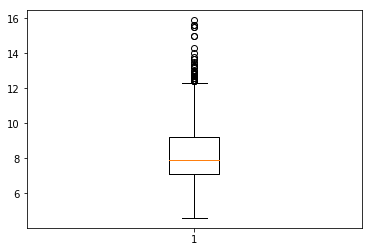

In [91]:
plt.boxplot(df["fixed acidity"])

In [93]:
from scipy.stats import zscore

In [94]:
z=np.abs(zscore(df))
threshold=3
df=df[(z<3).all(axis=1)]

In [95]:
x=df.iloc[:,:-2]
y=df.iloc[:,-2]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
accuracy_score(y_test,pred)

0.6346555323590815